### Code below is for reading in + analysis

In [1]:
import pandas as pd 
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'size':18})
import matplotlib.cm as cmap
%matplotlib inline
from multiprocessing import Pool
# from profilestats import profile
from scipy.stats import binned_statistic, skew, iqr
from scipy.optimize import curve_fit
from funcs.analysis.analysis import *
from funcs.preprocessing.binning import bin_data  
from os import listdir
import os
import time

In [2]:
from funcs.preprocessing.dtdm import dtdm, dtdm_key

In [3]:
config = {'obj':'qsos','ID':'uid'  ,'t_max':23576,'n_bins_t':200,'n_bins_m':200,'n_t_chunk':19, 'width':2, 'steepness':0.005}

width   = config['width']
steepness = config['steepness']
obj = config['obj']
ID  = config['ID']
t_max = config['t_max']
n_bins_t = config['n_bins_t']
n_bins_m = config['n_bins_m']
n_t_chunk = config['n_t_chunk']

all_q = dtdm(obj, 'all', 'all qsos', 200, 200, t_max, n_t_chunk, steepness, width);
# sep = dtdm(obj, 'sep', 200, 200, t_max, n_t_chunk, 0.005, 1);s
sdss_sdss_q = dtdm(obj, 'sdss_sdss', 'sdss-sdss qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
ps_ps_q = dtdm(obj, 'ps_ps', 'ps-ps qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
ztf_ztf_q = dtdm(obj, 'ztf_ztf', 'ztf-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width);

sdss_ps_q = dtdm(obj, 'sdss_ps', 'sdss-ps qsos', 200, 200, t_max, n_t_chunk, steepness, width);
sdss_ztf_q = dtdm(obj, 'sdss_ztf', 'sdss-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
ps_ztf_q = dtdm(obj, 'ps_ztf', 'ps-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width);

# survey_list_q = [all_q, sdss_ps_q, sdss_ztf_q, ps_ztf_q, sdss_sdss_q, ps_ps_q, ztf_ztf_q]
survey_list_q = [all_q]

TypeError: __init__() missing 2 required positional arguments: 'width' and 'leftmost_bin'

In [3]:
# If we are using a key
config = {'obj':'qsos','ID':'uid'  ,'t_max':23576,'n_bins_t':200,'n_bins_m':200, 'n_bins_m2':248, 'n_t_chunk':19, 'width':2, 'steepness':0.005, 'leftmost_bin':-0.244}

width   = config['width']
steepness = config['steepness']
obj = config['obj']
ID  = config['ID']
t_max = config['t_max']
n_bins_t = config['n_bins_t']
n_bins_m = config['n_bins_m']
n_bins_m2 = config['n_bins_m2']
n_t_chunk = config['n_t_chunk']
leftmost_bin = config['leftmost_bin']
all_q = dtdm_key(obj, 'all', 'all qsos', 'Lbol', n_bins_t, n_bins_m, n_bins_m2, t_max, n_t_chunk, steepness, width, leftmost_bin);
survey_list_q = [all_q]


In [4]:
config = {'obj':'calibStars','ID':'uid_s','t_max':7772,'n_bins_t':200,'n_bins_m':200,'n_t_chunk':19, 'width':1, 'steepness':0.005}

width   = config['width']
steepness = config['steepness']
obj = config['obj']
ID  = config['ID']
t_max = config['t_max']
n_bins_t = config['n_bins_t']
n_bins_m = config['n_bins_m']
n_t_chunk = config['n_t_chunk']

all_s = dtdm(obj, 'all', 'all stars', 200, 200, t_max, n_t_chunk, steepness, width);
# sep = dtdm(obj, 'sep', 200, 200, t_max, n_t_chunk, 0.005, 1);
sdss_sdss_s = dtdm(obj, 'sdss_sdss' ,'sdss-sdss stars', 200, 200, t_max, n_t_chunk, steepness, width); 
ps_ps_s = dtdm(obj, 'ps_ps', 'ps-ps stars', 200, 200, t_max, n_t_chunk, steepness, width); 
ztf_ztf_s = dtdm(obj, 'ztf_ztf', 'ztf-ztf stars', 200, 200, t_max, n_t_chunk, steepness, width);

sdss_ps_s = dtdm(obj, 'sdss_ps', 'sdss-ps stars', 200, 200, t_max, n_t_chunk, steepness, width);
sdss_ztf_s = dtdm(obj, 'sdss_ztf', 'sdss-ztf stars', 200, 200, t_max, n_t_chunk, steepness, width); 
ps_ztf_s = dtdm(obj, 'ps_ztf', 'ps-ztf stars', 200, 200, t_max, n_t_chunk, steepness, width);

survey_list_s = [all_s, sdss_ps_s, sdss_ztf_s, ps_ztf_s, sdss_sdss_s, ps_ps_s, ztf_ztf_s]

In [4]:
print('qsos:')
all_q.stats(verbose=True)
# print('stars:')
# all_s.stats(verbose=True)

qsos:
dtdm counts in 0<t<184: 280,540,494
dtdm counts in 184<t<401: 14,613,442
dtdm counts in 401<t<658: 19,826,273
dtdm counts in 658<t<962: 24,059,531
dtdm counts in 962<t<1322: 11,815,193
dtdm counts in 1322<t<1749: 10,253,842
dtdm counts in 1749<t<2253: 6,897,638
dtdm counts in 2253<t<2850: 5,872,886
dtdm counts in 2850<t<3557: 4,967,703
dtdm counts in 3557<t<4393: 2,107,789
dtdm counts in 4393<t<5383: 1,787,074
dtdm counts in 5383<t<6555: 2,510,011
dtdm counts in 6555<t<7941: 2,775,322
dtdm counts in 7941<t<9582: 892,243
dtdm counts in 9582<t<11525: 652,834
dtdm counts in 11525<t<13824: 851,088
dtdm counts in 13824<t<16545: 440,666
dtdm counts in 16545<t<19765: 91,228
dtdm counts in 19765<t<23576: 7,634


/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:295: RuntimeWarning: invalid value encountered in true_divide
  mean = x.sum(axis=-1)/N_dm


/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:340: RuntimeWarning: invalid value encountered in true_divide
  SF = (((self.m2_bin_centres**2)*self.dm2_de2_binned[i]).sum(axis=-1)/self.dm2_de2_binned[i].sum(axis=-1))


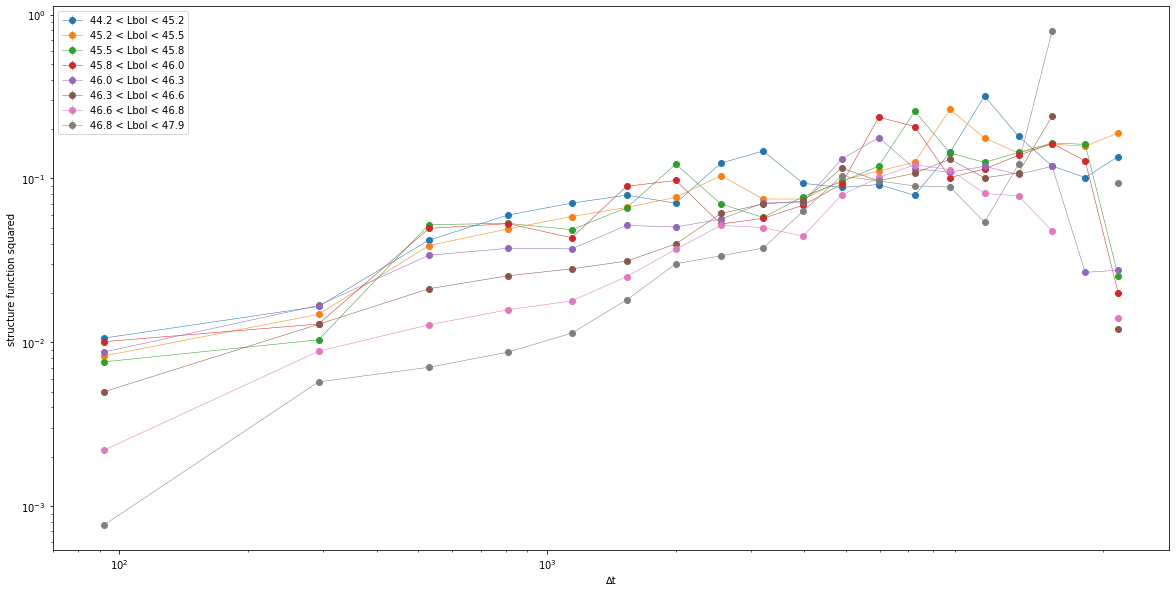

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
for i,surv in enumerate(survey_list_q):
    figax, SF = surv.plot_sf_dm2_de2(figax=(fig,ax))
ax.legend()

In [6]:
all_q.dm2_de2_binned

array([[[ 290,  496,  643, ...,  233,  173,  155],
        [  53,   71,  111, ...,  148,  136,  115],
        [   4,    1,    2, ...,   38,   20,   30],
        ...,
        [   0,    0,    0, ...,  224,  207,  215],
        [   0,    0,    0, ...,   59,   68,   64],
        [   0,    0,    0, ...,   12,   11,   19]],

       [[ 415,  566,  801, ...,  181,  171,  139],
        [   9,   19,   24, ...,  104,   83,   71],
        [   3,    4,    3, ...,   28,   26,   24],
        ...,
        [   0,    0,    0, ...,  285,  309,  229],
        [   0,    0,    0, ...,   16,   12,   22],
        [   0,    0,    0, ...,    1,    3,   10]],

       [[ 630,  943, 1262, ...,  189,  198,  146],
        [   7,    3,    6, ...,   20,   23,   22],
        [   2,    0,    4, ...,   95,   75,   78],
        ...,
        [   0,    0,    0, ...,  103,   87,   83],
        [   0,    0,    0, ...,    6,    0,    1],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[ 117,  183,  24

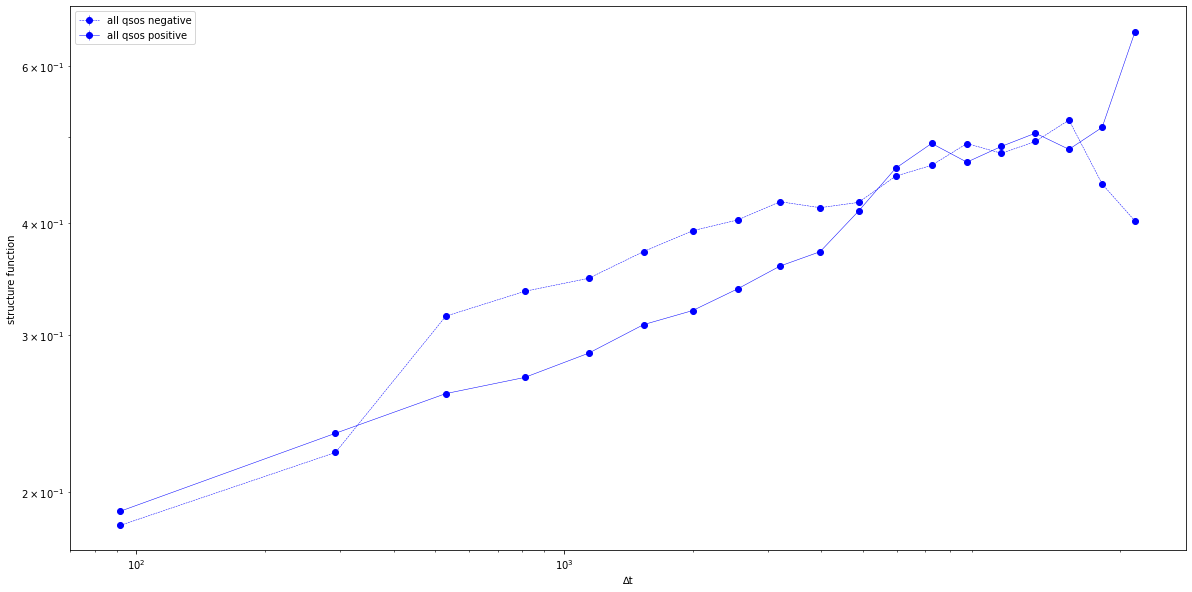

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
# for surv in survey_list_s[4:5]:
#     ax, SF = surv.plot_sf_ensemble_asym(ax=ax)
for i,surv in enumerate(survey_list_q):
    figax, SF_n, SF_p = surv.plot_sf_ensemble_asym(figax=(fig,ax), color='brgkcmy'[i])
ax.legend()
# fig.savefig('')

In [7]:
# #Testing IQR with brute force
# full_dist_list = []
# for d, bins in zip(dms_binned,all_.m_bin_centres):
#     full_dist_list.append(np.full(shape=d, fill_value=bins))
# full_dist = np.concatenate(full_dist_list)
# iqr(full_dist)

In [8]:
# This should be the value we get for bin 0


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
for surv in survey_list_s[:1]:
    ax, SF = surv.plot_sf_ensemble_iqr(ax=ax)
for surv in survey_list_q[:1]:
    ax, SF = surv.plot_sf_ensemble_iqr(ax=ax)
ax.legend()
ax.set(title='Structure function using IQR method')
# fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_SF.jpg'.format(surv.obj,surv.obj), dpi=300, bbox_inches='tight')

(<Figure size 1080x4104 with 19 Axes>, <AxesSubplot:>)

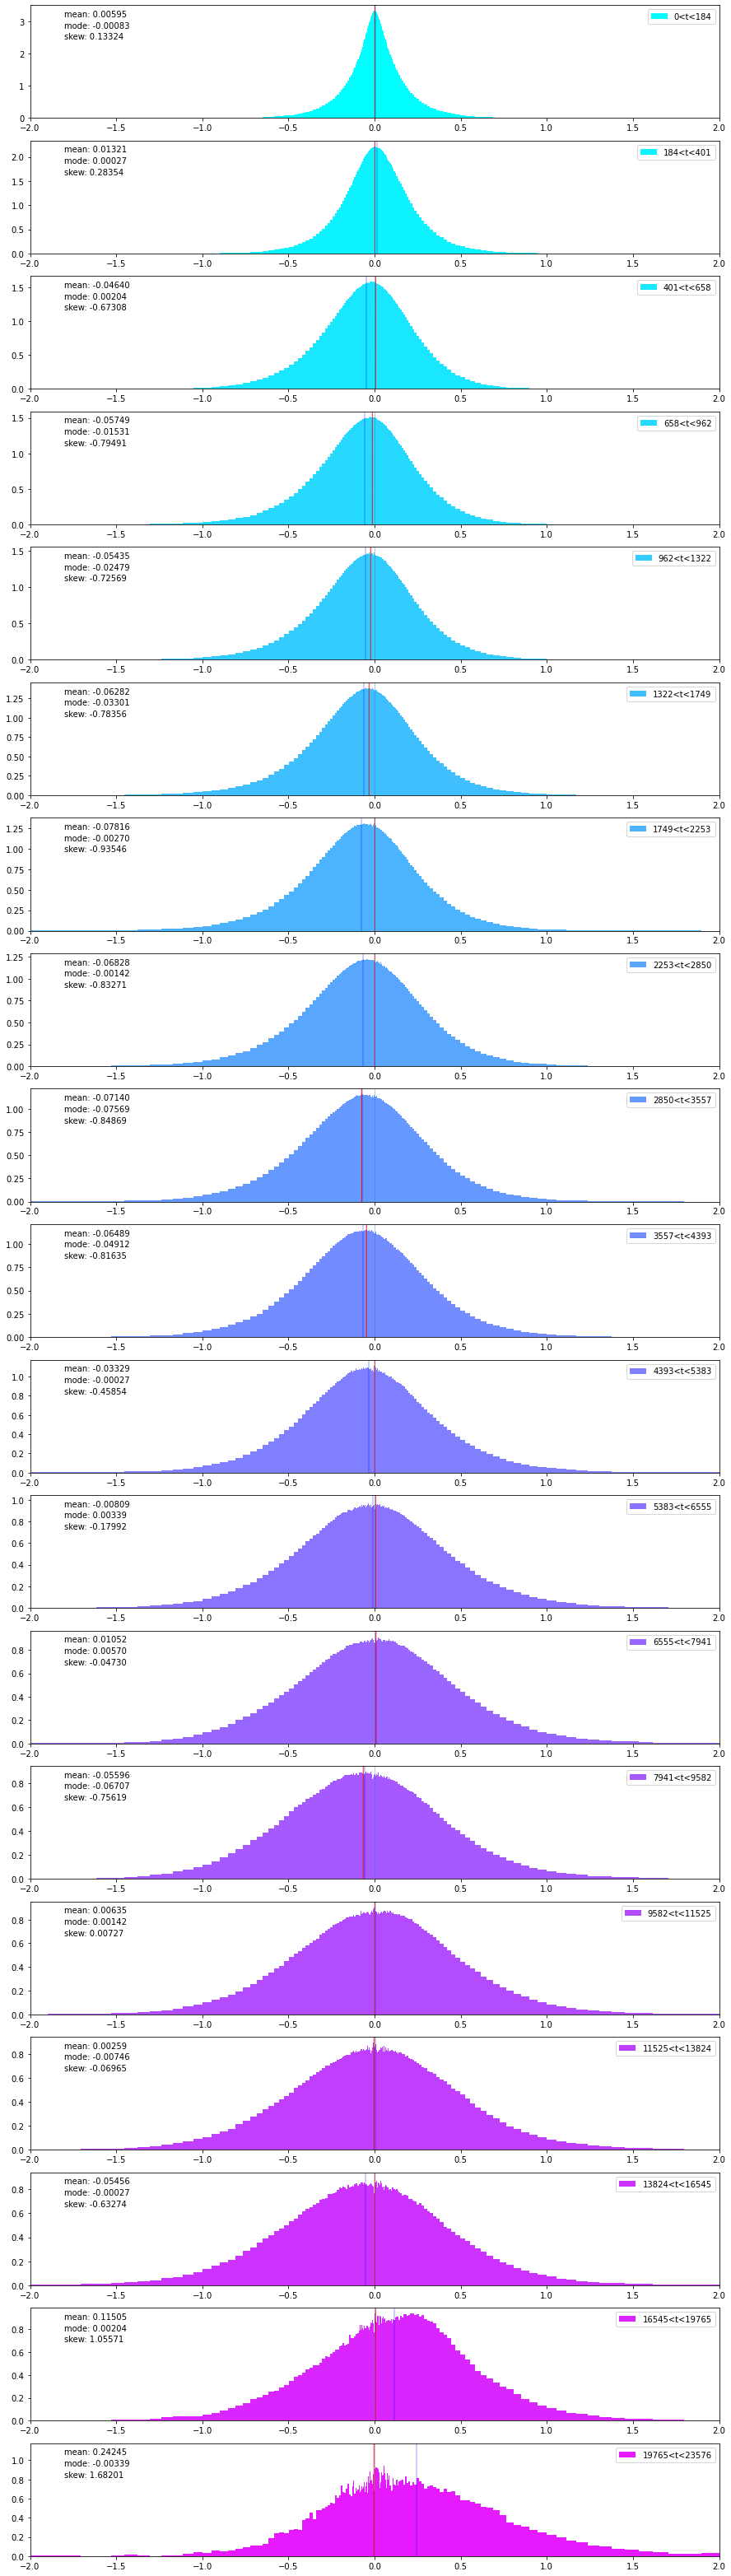

In [19]:
all_q.hist_dm(2)

best fit by power law with exponent: 0.1889528763991627


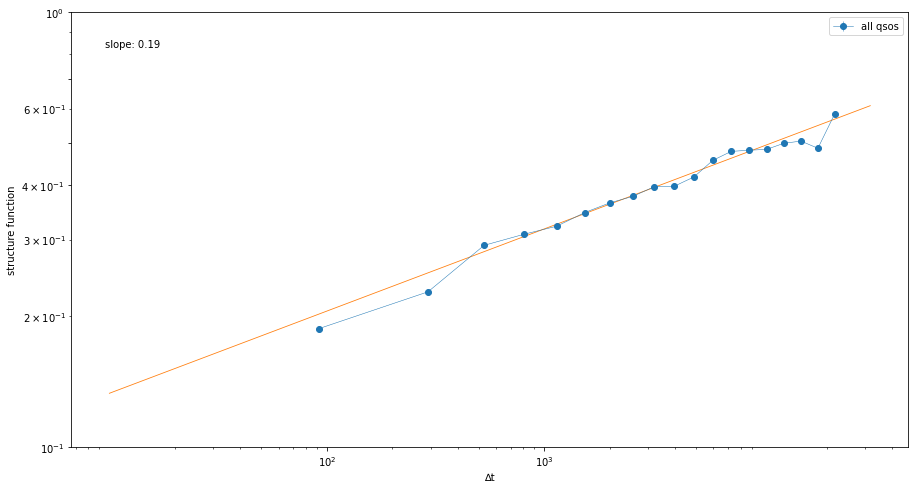

In [15]:
# QSOS
fig, ax = plt.subplots(1,1, figsize=(15,8))
# for surv in survey_list_s[4:5]:
#     ax, SF = surv.plot_sf_ensemble(ax=ax)
for surv in survey_list_q[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble(figax=(fig,ax))
ax.legend()
ax.set(ylim = [0.1,1], yticks=[0.1,0.5,0.4,0.7,1])
# ax.get_yaxis().set_major_formatter()
def power_law(x,a,b):
    return b * x ** a

from scipy.optimize import curve_fit

popt, pcov = curve_fit(power_law, all_q.t_bin_chunk_centres[3:15], SF[3:15])

x = np.logspace(1,4.5, 19)
y = power_law(x, *popt)
ax.text(0.04, 0.92, 'slope: {:.2f}'.format(popt[0]), transform=ax.transAxes)
ax.plot(x,y, lw=0.8)

print('best fit by power law with exponent: {}'.format(popt[0]))
fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_SF_fit.jpg'.format(surv.obj,surv.obj), dpi=300, bbox_inches='tight')

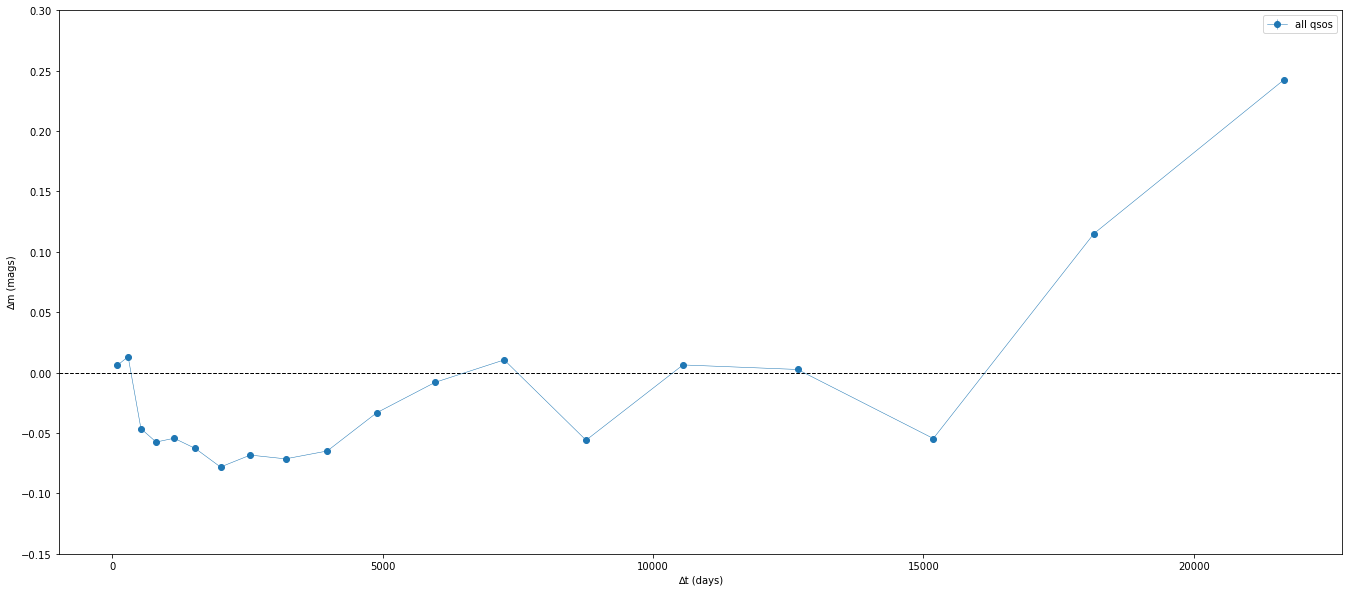

In [18]:
# QSOS
fig, ax = plt.subplots(1,1, figsize=(23,10))
# for surv in survey_list_s[:1]:
#     surv.plot_means(ax, ls='-')
for surv in survey_list_q[:1]:
    surv.plot_means(ax, ls='-')
ax.legend()
ax.set(xlabel='∆t (days)', ylabel='∆m (mags)', ylim=[-0.15,0.3])
ax.axhline(y=0, lw=1, ls='--', color='k')
fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_drift_mean.jpg'.format(obj,obj), dpi=300, bbox_inches='tight')

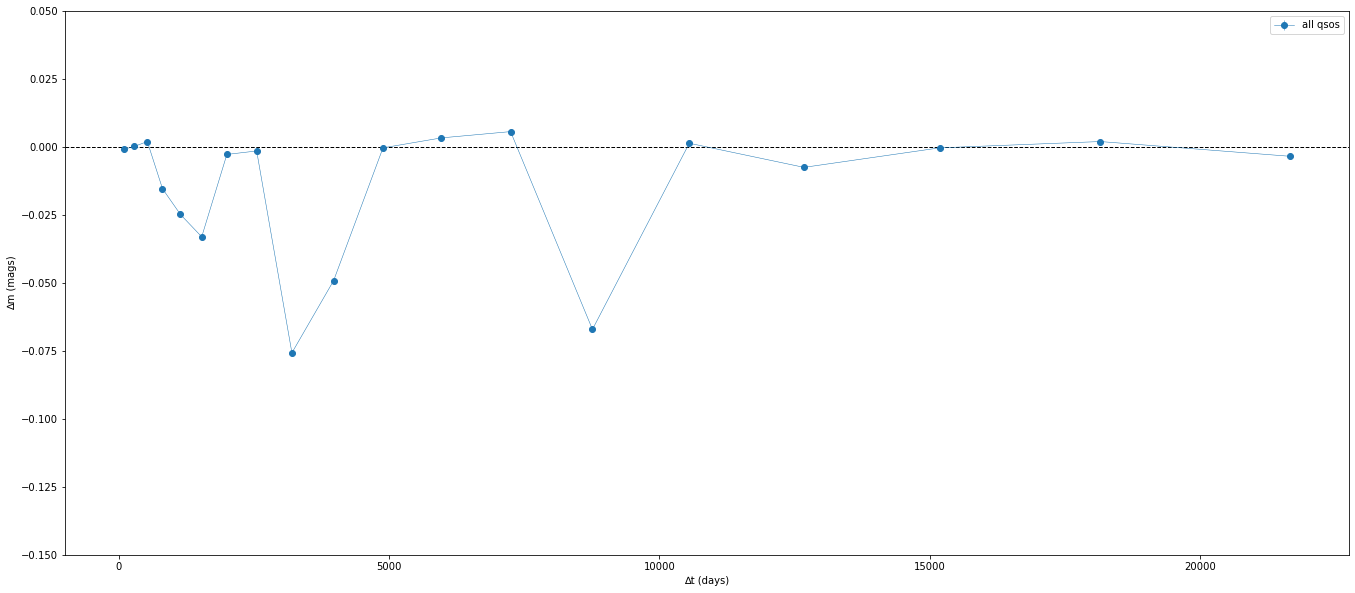

In [20]:
# QSOS
fig, ax = plt.subplots(1,1, figsize=(23,10))
for surv in survey_list_q[:1]:
    surv.plot_modes(ax, ls='-')
# for surv in survey_list_s[:1]:
#     surv.plot_modes(ax, ls='-')
ax.legend()
ax.set(xlabel='∆t (days)', ylabel='∆m (mags)', ylim=[-0.15,0.05])
ax.axhline(y=0, lw=1, ls='--', color='k')
fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_drift_mode.jpg'.format(obj,obj), dpi=300, bbox_inches='tight')

In [12]:
# for a in obj_list[:1]:
#     a.hist_dm(window_width=0.1, overlay_gaussian=True, overlay_lorentzian=False, save=False)

In [13]:
# redefining dcat, because ZTF-PS is equivalent to PS-ZTF
# for a,b in zip([1,2,5],[3,6,7]):
#     dcat_result[:,a] = dcat_result[:,a] + dcat_result[:,b]
# dcat_result = dcat_result[:,(0,4,8,1,2,5)]

In [14]:
# fig, axes = plt.subplots(2,3, figsize = (16,8))
# labels    = ['SDSS-SDSS', 'PS-PS', 'ZTF-ZTF', 'SDSS-PS', 'SDSS-ZTF', 'PS-ZTF']
# for i, ax in enumerate(axes.ravel()):
#     ax.hist(t_bin_chunk[:-1], weights = dcat_result[:,i], alpha=0.5, label=labels[i], edgecolor='black', lw=1.2)
#     ax.set(yscale='log', xlabel='∆t (days)')
#     ax.legend()   
# fig.savefig('dt_distribution.pdf', bbox_inches='tight')

In [15]:
# Asymmetry of SF
# fig, ax = plt.subplots(1,1,figsize = (16,8))
# plot_sf_ensemble(dts_binned_tot_sep[:,:100], dms_binned_tot_sep[:,:100], ax)
# plot_sf_ensemble(dts_binned_tot_sep[:,100:], dms_binned_tot_sep[:,100:], ax)

In [16]:
# splitting up by redshift
# key = 'redshift' 
# bounds, z_score, bounds_values, ax = dr.bounds(key, bounds = np.array([-5,-1,-0.5,0,0.5,1,5]))
# uids = dr.properties['mjd_ptp_rf'][(bounds[i]<z_score)&(z_score<bounds[i+1])].sort_values(ascending=False).head(100000).index

In [17]:
config = {'obj':'qsos','ID':'uid','t_max':6751,'n_bins_t':200,'n_bins_m':200,'n_t_chunk':19, 'width':2, 'steepness':0.005}
# config = {'obj':'calibStars','ID':'uid_s','t_max':7772,'n_bins_t':200,'n_bins_m':200,'n_t_chunk':19, 'width':1, 'steepness':0.005}

width   = config['width']
steepness = config['steepness']
obj = config['obj']
ID  = config['ID']
t_max = config['t_max']
n_bins_t = config['n_bins_t']
n_bins_m = config['n_bins_m']
n_t_chunk = config['n_t_chunk']
key = 'Lbol'

all_q = dtdm_key(obj, 'all', 'all qsos', key, 200, 200, t_max, n_t_chunk, steepness, width);

In [18]:
all_q.stats()

/disk1/hrb/python/analysis/funcs/dtdm.py:218: RuntimeWarning: invalid value encountered in true_divide
  mean = x.sum(axis=-1)/N_dm


In [19]:
all_q.means[0]

array([ 0.008001  ,  0.02135113,  0.03100937, -0.0079908 , -0.03225297,
       -0.10660682, -0.1268281 , -0.13897841, -0.14498472, -0.13999785,
       -0.12833754, -0.1931532 , -0.2792729 , -0.25879281, -0.21199536,
       -0.16609429, -0.1285892 , -0.10386634, -0.05591071])

/disk1/hrb/python/analysis/funcs/dtdm.py:244: RuntimeWarning: invalid value encountered in true_divide
  SF = (((self.m_bin_centres**2)*self.dms_binned[i]).sum(axis=-1)/self.dms_binned[i].sum(axis=-1))**0.5
/disk1/hrb/python/analysis/funcs/dtdm.py:245: RuntimeWarning: divide by zero encountered in power
  SF[self.dms_binned[i].sum(axis=-1)**-0.5 > 0.1] = np.nan
/disk1/hrb/python/analysis/funcs/dtdm.py:247: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, SF, yerr=self.dms_binned[i].sum(axis=-1)**-0.5*self.means[i], lw = 0.5, marker = 'o', label=self.label_range_val[i])


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

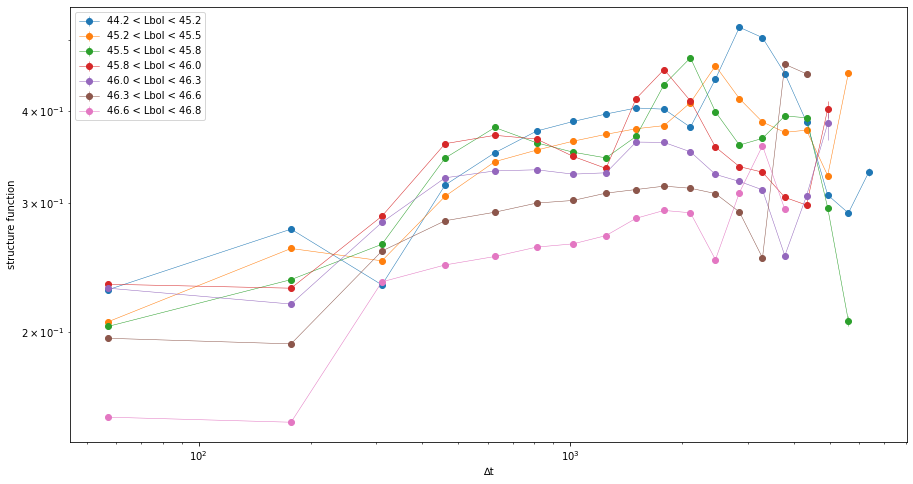

In [20]:
fig, ax = all_q.plot_sf_ensemble()
fig.savefig('/disk1/hrb/python/analysis/{}/plots/SF_{}_{}.jpg'.format(obj,obj,key), bbox_inches='tight')

/disk1/hrb/python/analysis/funcs/dtdm.py:210: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, self.means[i], yerr=self.means[i]*(self.dms_binned[i].sum(axis=-1)**-0.5), lw=0.5, marker='o', label=self.label_range_val[i])


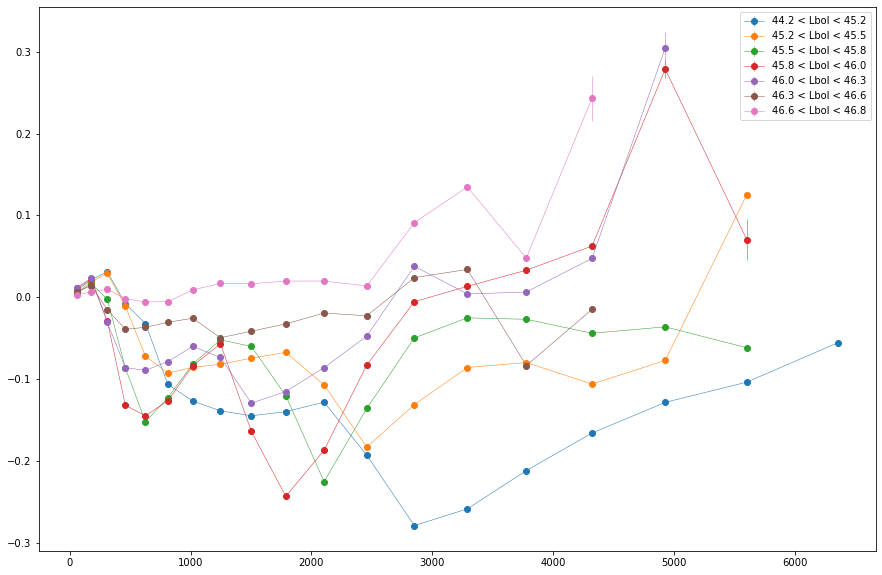

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
all_q.plot_means(ax)
ax.legend()

/disk1/hrb/python/analysis/funcs/dtdm.py:216: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, self.modes[i], yerr=self.means[i]*(self.dms_binned[i].sum(axis=-1)**-0.5), lw=0.5, marker='o', label=self.label_range_val[i])


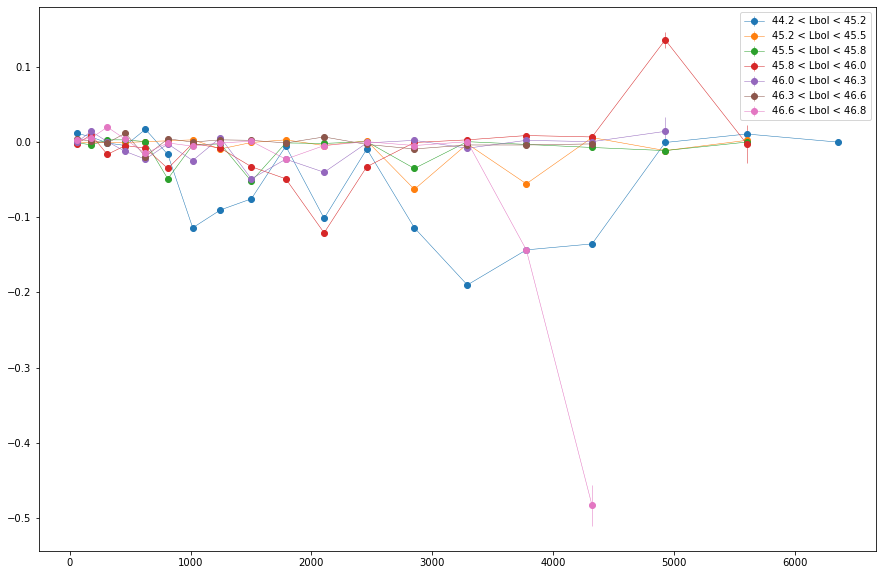

In [35]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
all_q.plot_modes(ax)
ax.legend()